# Modèle de courbe de taux : Projet 3A ENSAI

## Parie 1: Reconstitution d'une courbe de taux zero coupons

### 1.1. Formule de valorisation des taux de marché

1. Le tableau 1 décrit une courbe de taux interbancaire.
En effet, les instruments qu'il contient et desquels on derivera nos taux zero coupons pour differentes maturités sont essentiellement des taux de marché monétaire (money market), des contrats futures et des swaps.


2.  Ce tableau contient trois types d'instruments financiers:
    - Des Money market :  Il s'agit des taux (monétaires) à court terme sur le marché interbancaire. Dans le contexte de notre exercice, il s'agit de taux Libor  pour les maturités allant de 3 mois à 1 an.

    - Des contrats futures de taux d'intérêt : Il s'agit de contrats à capitalisation future qui s'échangent sur un marché réglémenté. On le définit comme un instrument financier permettant aux institutions financières de s'engager sur l'évolution d'un taux d'intérêt à une date future, à un niveau fixé aujourd’hui. Les futures de taux d’intérêt sont utilisés pour se couvrir contre le risque de variation des taux ou pour spéculer. Aussi, afin de limiter le risque de contrepartie, ces contrats sont compensés quotidiennement par une chambre de compensation. 
    Le tableau 1 met contient des futures de taux d'intérêt  pour des maturité allant de 1.25 ans à 2.75 ans


    - Des swaps de taux d'intérêts: Un swap de taux d'intérêt est un contrat entre deux parties visant à échanger des flux financiers basés sur un montant notionnel déterminé. Généralement, l'une des parties verse des paiements à taux fixe, tandis que l'autre paie des intérêts à taux variable, indexés sur un indice de référence (dans notre cas, le Libor). Cet échange se fait selon un échéancier prédéfini et permet aux institutions financières de se couvrir contre le risque de taux d'intérêt ou d'optimiser leurs coûts de financement.
    Le tabeau 1 contient des Swaps dont les tenors vont de 3 à 30 ans

## 1.2. Construction de la courbe des taux zero coupons

1. 
L’interpolation des taux de swap pour obtenir des cotations annuelles simplifie la méthode du bootstrapping en alignant les échéances des instruments de marché avec celles utilisées dans la construction de la courbe zéro-coupon. Cela évite d’avoir à gérer des échéances intermédiaires ou irrégulières, réduisant ainsi la complexité des calculs. De plus, cela permet une extraction plus directe des taux zéro-coupon à chaque étape du bootstrap et garantit une courbe plus fluide et cohérente, facilitant son utilisation pour la valorisation d’instruments financiers.

#### 2. Construisons une nouvelle courbe de taux de marché avec une cotation annuelle de taux SWAP à l'aide d'une méthode d'interpolation spline


In [52]:
! pip install openpyxl

You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [53]:
import functions

In [54]:
import pandas as pd
df = pd.read_excel("Data.xlsx")

In [55]:
df = df.rename(columns={'Unnamed: 0': "Instru"})
df.head()

,Instru,MAT,MKT
0,MM,0.25,0.030698
1,MM,0.50,0.026191
2,MM,0.75,0.023958
3,MM,1.00,0.022979
4,FUT,1.25,0.978691


In [56]:
import importlib
import warnings
warnings.filterwarnings("ignore")
importlib.reload(functions)


<module 'functions' from '\\\\filer-profil-w1\\DEM-User-Profiles\\id2374\\Desktop\\Projets_3A\\Asset-management_deba\\Yield Curve\\modele_courbe_taux_M\\functions.py'>

In [57]:
data_swap = functions.interpolation_spline_swap(df)

In [58]:
data_swap.head()

,Instru,MAT,MKT
0,SWAP,3.000000,0.026112
1,SWAP,3.272727,0.026727
2,SWAP,3.545455,0.027286
3,SWAP,3.818182,0.027798
4,SWAP,4.090909,0.028271


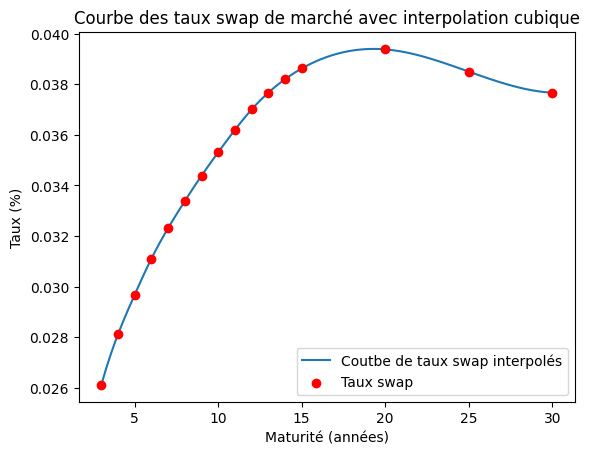

In [59]:
import matplotlib.pyplot as plt
plt.plot(data_swap['MAT'].values,data_swap['MKT'].values, label ="Coutbe de taux swap interpolés")
plt.scatter(df[df['Instru']== "SWAP"]['MAT'].values,df[df['Instru']== "SWAP"]['MKT'].values,color = "red", label = "Taux swap", zorder =3)

plt.title("Courbe des taux swap de marché avec interpolation cubique")
plt.xlabel("Maturité (années)")  # Axe des abscisses
plt.ylabel("Taux (%)")

plt.legend()
plt.show()

#### 3. Calculons les taux zeros coupons associés à toutes les maturités de marché

##### - Pour les taux courts : on s'interesse aux money markets

In [60]:
importlib.reload(functions)
rates, Bts = functions.compute_R_B (df)

In [61]:
print(rates, "\n", Bts)

[0.03058052437217397, 0.026021103788009235, 0.023745232809651642, 0.022718994157501532] 
 [0.9923840185899867, 0.9870737194680732, 0.9823487170937096, 0.9775371388289023]


##### Les taux sur le moyen terme : future 3 mois

In [62]:
importlib.reload(functions)
rates_fut, Bts_fut = functions.compute_R_B_future(df)

In [63]:
print(rates_fut, "\n", Bts_fut)

[0.022425607093640297, 0.02249475307437572, 0.022844173565635624, 0.023363357988202355, 0.02397979505930941, 0.024599326242862787, 0.025221244779417805] 
 [0.9723572422494261, 0.9668207869467407, 0.9608112457268346, 0.9543481700640987, 0.9474751788022688, 0.9403545296645344, 0.9329922141394574]


##### Les taux sur le long terme : swap

In [64]:
import numpy as np
importlib.reload(functions)
maturities_selected = np.arange(3, 31, 1).tolist()
rates_interp_df = functions.interpolation_spline_swap_1_30(df)


In [65]:
rates_interp_df.head()

,Instru,MAT,MKT
0,SWAP,3,0.026112
1,SWAP,4,0.028117
2,SWAP,5,0.029680
3,SWAP,6,0.031107
4,SWAP,7,0.032313


In [66]:
importlib.reload(functions)
Bts_swap, rates_swap = functions.compute_R_B_swap(rates_interp_df['MAT'].values.tolist(), rates_interp_df['MKT'].values.tolist(), Bts_fut[3] , Bts[3])

In [67]:

# Fusionnons les resultats pour toutes les maturités
all_rates = rates + rates_fut + rates_swap
all_maturities = df[df['Instru'] == "MM"]["MAT"].values.tolist() + df[df['Instru'] == "FUT"]["MAT"].values.tolist() + maturities_selected
Bt_all = Bts + Bts_fut + Bts_swap
Instru = ["MM"]*len(df[df['Instru'] == "MM"]["MAT"].values.tolist()) + ["FUT"]*len(df[df['Instru'] == "FUT"]["MAT"].values.tolist()) + ["SWAP"]*len(maturities_selected)

In [68]:
# Créons le DataFrame
zero_coupons_df = pd.DataFrame({"Instru": Instru, "MAT": all_maturities, "Taux_zc": all_rates, "Bt_T": Bt_all})
zero_coupons_df.head()

,Instru,MAT,Taux_zc,Bt_T
0,MM,0.25,0.030581,0.992384
1,MM,0.50,0.026021,0.987074
2,MM,0.75,0.023745,0.982349
3,MM,1.00,0.022719,0.977537
4,FUT,1.25,0.022426,0.972357


#### Construction de la courbe de taux 

Nous allons choisir differentes méthodes d'interpolation pour la construction des courbes de taux zero coupons et évaluer leur impact sur le calcul des taux de marché

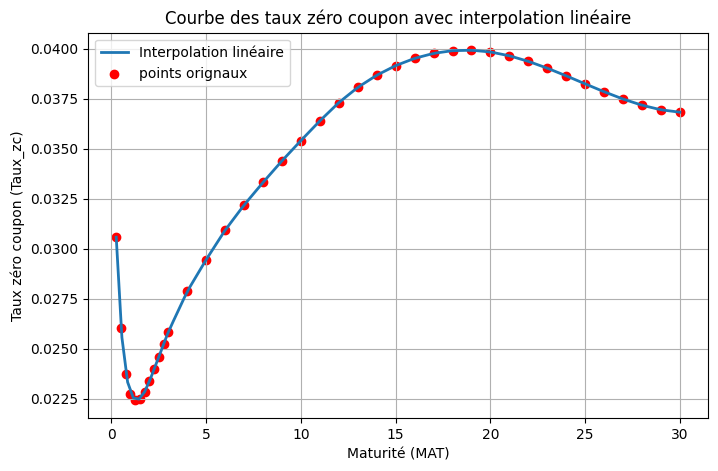

In [69]:
###A partir de la courbe de taux zero coupons, construisons la courbe de taux forward de tenor 3M à l'aide d'une 
# interpolation linéaire
# On suppose la fonction des taux zero coupons linéaire par morceaux 
from scipy.interpolate import interp1d

# Créons une interpolation linéaire
interp_func = interp1d(zero_coupons_df["MAT"], zero_coupons_df["Taux_zc"], kind="linear", fill_value="extrapolate")
# Générons des points interpolés
maturities_interp = np.linspace(zero_coupons_df["MAT"].min(), zero_coupons_df["MAT"].max(), 100)  # 100 points pour lisser la courbe
taux_interp = interp_func(maturities_interp)


plt.figure(figsize=(8, 5))
plt.plot(maturities_interp, taux_interp, '-', label="Interpolation linéaire", linewidth=2)
plt.scatter(zero_coupons_df["MAT"],zero_coupons_df["Taux_zc"], color = "red", label ="points orignaux")
plt.xlabel("Maturité (MAT)")
plt.ylabel("Taux zéro coupon (Taux_zc)")
plt.title("Courbe des taux zéro coupon avec interpolation linéaire")
plt.legend()
plt.grid(True)
plt.show()


In [70]:
### Pour cette interpolation (linéaire)+, on calcule le taux forward 3 mois

def taux_forward_3M(zero_coupons_df, delta = 0.25):
    taux_libor_all = []
    taux_forward_all = []
    interp_func = interp1d(zero_coupons_df["MAT"], zero_coupons_df["Taux_zc"], kind="linear", fill_value="extrapolate")
    maturities_interp = np.linspace(zero_coupons_df["MAT"].min(), zero_coupons_df["MAT"].max(), 100).tolist()
    for T in maturities_interp:
        R_0_T = interp_func(T)
        B_0_T = np.exp(-1*R_0_T*T)
        R_0_T_delta = interp_func(T + delta)
        B_0_T_delta = np.exp(-1*R_0_T_delta*(T+ delta))
        taux_libor = (1/delta)*((B_0_T/B_0_T_delta)-1)
        taux_libor_all.append(taux_libor)
        
        num_f = (1 + R_0_T_delta)**(T+delta)
        denom_f = (1+ R_0_T)**(T)
        taux_forward = ((num_f/denom_f)**(1/delta)) - 1
        taux_forward_all.append(taux_forward)
    return taux_libor_all, taux_forward_all



In [71]:
taux_libor_all, taux_forward_all = taux_forward_3M(zero_coupons_df, delta = 0.25)

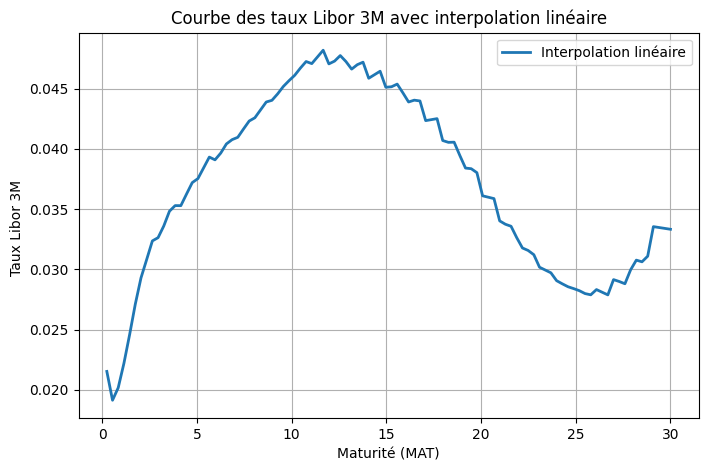

In [72]:
plt.figure(figsize=(8, 5))
plt.plot(maturities_interp, taux_libor_all, '-', label="Interpolation linéaire", linewidth=2)
plt.xlabel("Maturité (MAT)")
plt.ylabel("Taux Libor 3M ")
plt.title("Courbe des taux Libor 3M avec interpolation linéaire")
plt.legend()
plt.grid(True)
plt.show()


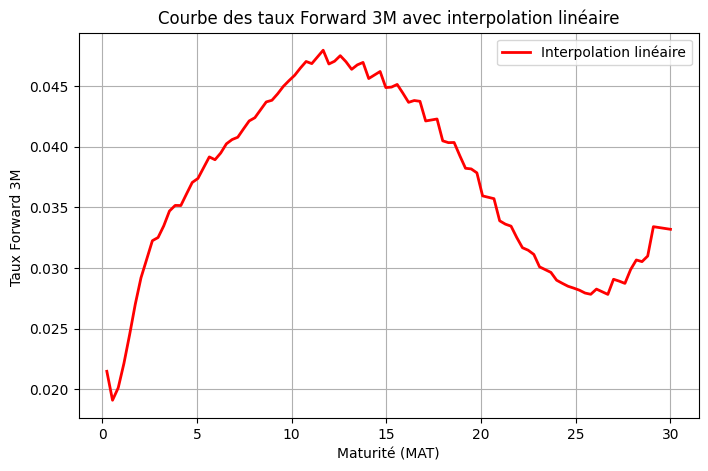

In [73]:
plt.figure(figsize=(8, 5))
plt.plot(maturities_interp, taux_forward_all, '-', color = "red", label="Interpolation linéaire", linewidth=2)
plt.xlabel("Maturité (MAT)")
plt.ylabel("Taux Forward 3M ")
plt.title("Courbe des taux Forward 3M avec interpolation linéaire")
plt.legend()
plt.grid(True)
plt.show()


#### Utilisons à présent une interpolation spline cubique

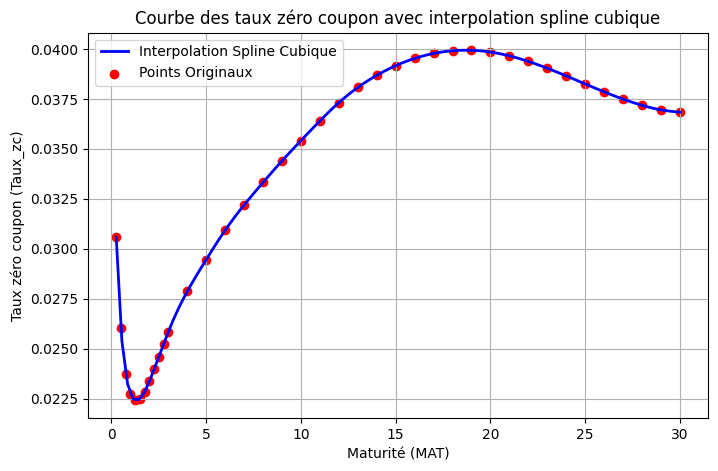

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline


# Création de la fonction d'interpolation spline cubique
spline_func = CubicSpline(zero_coupons_df["MAT"], zero_coupons_df["Taux_zc"], bc_type="natural")

# Générer des points interpolés pour lisser la courbe
maturities_interp = np.linspace(zero_coupons_df["MAT"].min(), zero_coupons_df["MAT"].max(), 100)
taux_interp = spline_func(maturities_interp)

# Tracer la courbe
plt.figure(figsize=(8, 5))
plt.plot(maturities_interp, taux_interp, '-', label="Interpolation Spline Cubique", linewidth=2, color="blue")
plt.scatter(zero_coupons_df["MAT"], zero_coupons_df["Taux_zc"], color="red", label="Points Originaux")
plt.xlabel("Maturité (MAT)")
plt.ylabel("Taux zéro coupon (Taux_zc)")
plt.title("Courbe des taux zéro coupon avec interpolation spline cubique")
plt.legend()
plt.grid(True)
plt.show()


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def taux_forward_3M_spline(zero_coupons_df, delta=0.25):
    taux_libor_all = []
    taux_forward_all = []
    # Création de la fonction d'interpolation spline
    spline_func = CubicSpline(zero_coupons_df["MAT"], zero_coupons_df["Taux_zc"], bc_type="natural")
    # Générer des points interpolés
    maturities_interp = np.linspace(zero_coupons_df["MAT"].min(), zero_coupons_df["MAT"].max(), 100)

    for T in maturities_interp:
        R_0_T = spline_func(T)
        B_0_T = np.exp(-R_0_T * T)

        R_0_T_delta = spline_func(T + delta)
        B_0_T_delta = np.exp(-R_0_T_delta * (T + delta))

        taux_libor = (1 / delta) * ((B_0_T / B_0_T_delta) - 1)
        taux_libor_all.append(taux_libor)

        # Formule du taux forward
        num_f = (1 + R_0_T_delta) ** (T + delta)
        denom_f = (1 + R_0_T) ** T
        taux_forward = ((num_f / denom_f) ** (1 / delta)) - 1
        taux_forward_all.append(taux_forward)

    return taux_libor_all, taux_forward_all



In [76]:
taux_libor_all, taux_forward_all = taux_forward_3M_spline(zero_coupons_df, delta = 0.25)

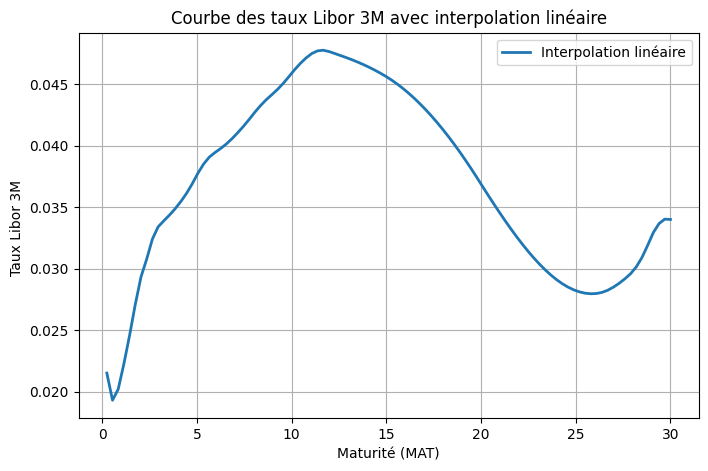

In [77]:
plt.figure(figsize=(8, 5))
plt.plot(maturities_interp, taux_libor_all, '-', label="Interpolation linéaire", linewidth=2)
plt.xlabel("Maturité (MAT)")
plt.ylabel("Taux Libor 3M ")
plt.title("Courbe des taux Libor 3M avec interpolation linéaire")
plt.legend()
plt.grid(True)
plt.show()


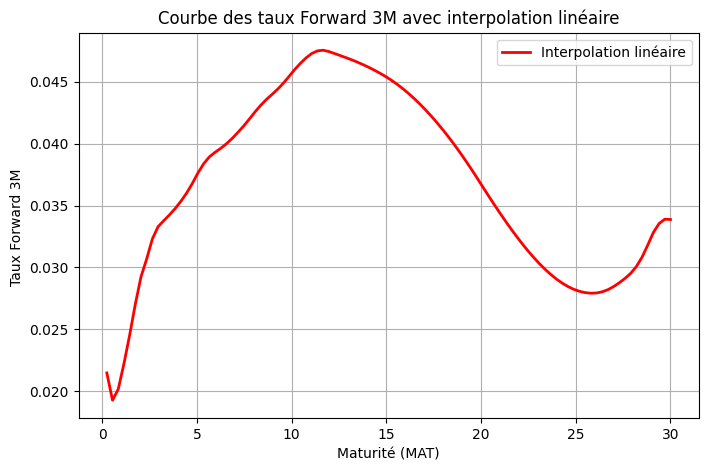

In [78]:
plt.figure(figsize=(8, 5))
plt.plot(maturities_interp, taux_forward_all, '-', color = "red", label="Interpolation linéaire", linewidth=2)
plt.xlabel("Maturité (MAT)")
plt.ylabel("Taux Forward 3M ")
plt.title("Courbe des taux Forward 3M avec interpolation linéaire")
plt.legend()
plt.grid(True)
plt.show()


### l'interpolation paramétrique de nelson siegel

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Fonction Nelson-Siegel
def nelson_siegel(tau, beta0, beta1, beta2, lamb):
    """
    Modèle de Nelson-Siegel pour l'estimation de la courbe des taux.
    
    tau : maturité (en années)
    beta0, beta1, beta2 : paramètres Nelson-Siegel
    lamb : paramètre de vitesse d'ajustement
    """
    term1 = beta0
    term2 = beta1 * (1 - np.exp(-tau / lamb)) / (tau / lamb)
    term3 = beta2 * ((1 - np.exp(-tau / lamb)) / (tau / lamb) - np.exp(-tau / lamb))
    return term1 + term2 + term3

# Fonction à minimiser (somme des erreurs quadratiques)
def objective_function(params, tau, rates):
    beta0, beta1, beta2, lamb = params
    fitted_rates = nelson_siegel(tau, beta0, beta1, beta2, lamb)
    return np.sum((fitted_rates - rates) ** 2)  # Somme des erreurs quadratiques

In [80]:


#  maturités et taux
tau = np.array(zero_coupons_df["MAT"])
rates = np.array(zero_coupons_df["Taux_zc"])

# Valeurs initiales des paramètres
initial_params = [0.02, -0.02, 0.02, 1.0]

# Estimation des paramètres avec scipy.optimize.minimize
result = minimize(objective_function, initial_params, args=(tau, rates), method='L-BFGS-B')

# Paramètres optimaux
beta0_opt, beta1_opt, beta2_opt, lamb_opt = result.x
print(f"Paramètres estimés : beta0 = {beta0_opt:.4f}, beta1 = {beta1_opt:.4f}, beta2 = {beta2_opt:.4f}, lambda = {lamb_opt:.4f}")



Paramètres estimés : beta0 = 0.0414, beta1 = -0.0073, beta2 = -0.0510, lambda = 1.0021


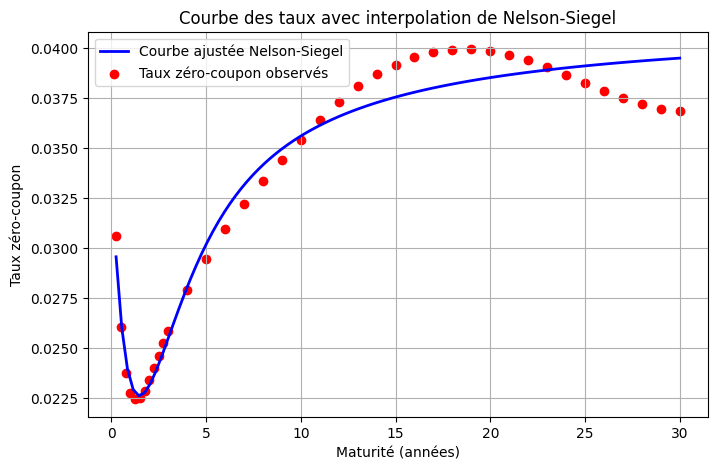

In [81]:

# Générer des points pour lisser la courbe
maturities_interp = np.linspace(tau.min(), tau.max(), 100)
taux_interp = nelson_siegel(maturities_interp, beta0_opt, beta1_opt, beta2_opt, lamb_opt)

# Tracer la courbe des taux avec Nelson-Siegel
plt.figure(figsize=(8, 5))
plt.plot(maturities_interp, taux_interp, '-', label="Courbe ajustée Nelson-Siegel", linewidth=2, color="blue")
plt.scatter(tau, rates, color="red", label="Taux zéro-coupon observés")
plt.xlabel("Maturité (années)")
plt.ylabel("Taux zéro-coupon")
plt.title("Courbe des taux avec interpolation de Nelson-Siegel")
plt.legend()
plt.grid(True)
plt.show()

##### Shiftons le taux de swap 5Y de 10 bps

# 2.Valorisation des swaptions et des caplets

2.1 Le marché utilise principalement le modèle de Black (ou modèle de Black 76) pour coter les caplets, les floorlets et les swaptions.

#### 2.2 Dynamique du taux forward et du taux swap forward

(confert page 235)

#### 2.3. Les formules de valorisation des oplets et swaptions sont disponibles à la page 201 du cours

#### 2.4  On veut calculer les prix de marché des caplets sur l’Euribor 12M avec une maturité de 5 ans et différents strikes donnés dans le tableau 1 des volatilités implicites


Un caplet est une option sur un taux d'intérêt à une date donnée. Il permet au détenteur de recevoir un paiement si le taux d’intérêt de référence dépasse un strike fixé à l’avance.


Dans notre cas, nous considérons un caplet sur l’Euribor 12M avec une maturité de 5 ans et un strike donné.

In [82]:
import numpy as np
import scipy.stats as stats  


In [147]:
def calculer_taux_forward(zero_coupons_df, T, delta=1):
    """
    Calcule le taux forward à partir des taux zéro-coupon en utilisant la formule avec delta.
    
    :param zero_coupons_df: DataFrame contenant les taux zéro-coupon et les maturités
    :param T: La maturité pour laquelle on veut calculer le taux forward
    :param delta: La différence entre les maturités, généralement 1 an ou une fraction d'année
    :return: Le taux forward à la maturité T
    """
    # On récupère les taux zéro-coupon pour les maturités T et T + delta
    taux_zc_T = zero_coupons_df[zero_coupons_df['MAT'] == T]['Taux_zc'].values[0]
    taux_zc_T_plus_delta = zero_coupons_df[zero_coupons_df['MAT'] == T + delta]['Taux_zc'].values[0]
    
    # Calcul du taux forward f(T) en utilisant la formule avec delta
    denom_f = np.exp(-taux_zc_T_plus_delta*(T+delta))  
    num_f = np.exp(-taux_zc_T*(T))
    taux_forward = 1/delta*((num_f /denom_f) - 1)
    return taux_forward


In [148]:
def prix_caplet(forward, strike, volatilite, T, delta=1):
    """
    Calcule le prix d'un caplet en utilisant la formule de Black.
    
    :param forward: Le taux forward pour la période donnée
    :param strike: Le strike du caplet en taux relatif
    :param volatilite: La volatilité implicite du caplet
    :param T: La maturité du caplet (en années)
    :param taux_zerocoupon: Le taux zéro-coupon pour la maturité T
    :return: Le prix du caplet
    """
    # Calcul des d1 et d2 pour la formule de Black
    d1 = (np.log(forward / strike) + 0.5 * volatilite**2 * T) / (volatilite * np.sqrt(T))
    d2 = d1 - volatilite * np.sqrt(T)
    
    # Fonction de répartition normale
    N_d1 = stats.norm.cdf(d1)
    N_d2 = stats.norm.cdf(d2)

    
    # Calcul du discount factor
    taux_zc_T_plus_delta = zero_coupons_df[zero_coupons_df['MAT'] == T + delta]['Taux_zc'].values[0]
    discount_factor = np.exp(-taux_zc_T_plus_delta * (T+delta))
    
    # Prix du caplet
    prix = discount_factor * (forward * N_d1 - strike * N_d2)
    return prix


In [149]:
def calculer_prix_caplets(zero_coupons_df, strikes, volatilites, T, delta =1):
    """
    Calcule les prix des caplets sur Euribor 12M à partir des données et des paramètres fournis.
    
    :param zero_coupons_df: DataFrame contenant les taux zéro-coupon et les maturités
    :param strikes: Liste des strikes en bps
    :param volatilites: Liste des volatilités implicites des caplets
    :param T: Maturité des caplets (en années)
    :return: Une liste des prix des caplets
    """
    prix_caplets = []
    
    # Calcul du taux forward pour la maturité T
    forward = calculer_taux_forward(zero_coupons_df, T)
    print(forward)
    
    for strike, volatilite in zip(strikes, volatilites):
        # Conversion du strike de bps en taux relatif
        strike_rel = forward + (strike / 10000) 
        # Calcul du prix du caplet pour chaque strike et volatilité
        prix = prix_caplet(forward, strike_rel, volatilite, T, delta =1)
        prix_caplets.append(prix)
    
    return prix_caplets


In [150]:
# Liste des strikes en bps 
strikes = [-100, -50, -25, 0, 25, 50, 100]

# Liste des volatilités des caplets
vol = [31.2/100, 28.4/100, 26.6/100, 25.0/100, 24.4/100, 25.0/100, 27.2/100]

# Maturité des caplets (5 ans)
T = 5

In [151]:
# Calculer les prix des caplets
prix_caplets = calculer_prix_caplets(zero_coupons_df, strikes, vol, T)

# Affichage des résultats
for i in range(len(prix_caplets)):  # Utilisation de prix_caplets au lieu de prix_caplet
    print("Le prix du caplet associé au strike ", strikes[i], " et à la volatilité", vol[i],"est :", prix_caplets[i],"\n")


0.03903200451171318
Le prix du caplet associé au strike  -100  et à la volatilité 0.312 est : 0.012514343501726262 

Le prix du caplet associé au strike  -50  et à la volatilité 0.284 est : 0.00980607849865568 

Le prix du caplet associé au strike  -25  et à la volatilité 0.266 est : 0.008420609692425534 

Le prix du caplet associé au strike  0  et à la volatilité 0.25 est : 0.00713720278140568 

Le prix du caplet associé au strike  25  et à la volatilité 0.244 est : 0.006200482581429531 

Le prix du caplet associé au strike  50  et à la volatilité 0.25 est : 0.005688878586030046 

Le prix du caplet associé au strike  100  et à la volatilité 0.272 est : 0.005172038745396815 



# Section 3.6 Calibration du modèle de hull and white

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from scipy.stats import norm

def caplet_h_w( T, delta, zero_coupons_df, sigma_i, K_tilde = None):
    # Récupération des taux zéro-coupon
    taux_zc_T = zero_coupons_df[zero_coupons_df['MAT'] == T]['Taux_zc'].values[0]
    taux_zc_T_plus_delta = zero_coupons_df[zero_coupons_df['MAT'] == T + delta]['Taux_zc'].values[0]
    
    # Calcul des prix zéro-coupon
    B_T_delta = np.exp(-taux_zc_T_plus_delta * (T + delta))  
    B_T = np.exp(-taux_zc_T * T)
    Z_T = B_T / B_T_delta
    if K_tilde == None:
        K_tilde = Z_T
    # Calcul des variables d1 et d2
    d1 = (np.log(Z_T / K_tilde) + 0.5 * (sigma_i ** 2) * T) / ((sigma_i) * np.sqrt(T))
    d2 = d1 - (sigma_i * np.sqrt(T))

    # Prix du caplet
    caplet_price = delta * B_T_delta * ((Z_T * norm.cdf(d1)) - (K_tilde * norm.cdf(d2)))
    
    return caplet_price

def calibrate_sigma_i( T, delta, zero_coupons_df, market_price):
    # Fonction à minimiser
    def objective(sigma_i):
        return (caplet_h_w(T, delta, zero_coupons_df, sigma_i) - market_price) ** 2

    # Recherche de sigma_i optimal
    result = minimize_scalar(objective, bounds=(0.0001, 2.0), method='bounded')

    return result.x  


In [114]:
test=caplet_h_w(T, delta, zero_coupons_df, sigma_i=0.9271/100)
test

0.007137405947555131

In [115]:
# Paramètres du caplet 
T = 5  # Maturité en années
delta = 1  # Période entre paiements en années
market_price = 0.7137 / 100  # Prix observé sur le marché

# Calibration de sigma_i
sigma_i_optimal = calibrate_sigma_i(T, delta, zero_coupons_df, market_price)

# Affichage du résultat
print(f"Sigma_i calibré : {sigma_i_optimal:.6f}")


Sigma_i calibré : 0.009271


In [116]:
import numpy as np

def compute_sigma(T, delta, sigma_i, lambda_):
    sigma_2 = (2 * lambda_ * (sigma_i ** 2) * T) / (
        (((1 - np.exp(-lambda_ * delta)) / lambda_) ** 2) * (1 - np.exp(-2 * lambda_ * T))
    )
    return np.sqrt(sigma_2)


In [117]:
sigma_ = compute_sigma(T, delta,sigma_i_optimal, 5/100 )
sigma_

0.010714066854397372

##### 2. Deduisons en les prix "modèles" issus de cette calibration des caplets de strikes FWD± 25 bps, FWD± 50 bps et FWD± 100 bps.


In [126]:
### On commence par determiner les prix "modèles" des caplets
taux_zc_T = zero_coupons_df[zero_coupons_df['MAT'] == T]['Taux_zc'].values[0]
taux_zc_T_plus_delta = zero_coupons_df[zero_coupons_df['MAT'] == T + delta]['Taux_zc'].values[0]
    
# Calcul des prix zéro-coupon
B_T_delta = np.exp(-taux_zc_T_plus_delta * (T + delta))  
B_T = np.exp(-taux_zc_T * T)
Z_T = B_T / B_T_delta

## On determine les differents strikes K_tilde
strikes = [-100, -50, -25, 0, 25, 50, 100]
K_tilde_ = [Z_T + elt/10000 for elt in strikes]

In [127]:
prix_model = []
for i in range(7):
    caplet_model =caplet_h_w( T, delta, zero_coupons_df, sigma_i=0.9271/100, K_tilde =K_tilde_[i])
    print(caplet_model)
    prix_model.append(caplet_model)


0.012015274980186293
0.0093886476423873
0.00821515892425082
0.007137405947555131
0.006155689726383603
0.0052690268199828
0.0037708413595045004


In [153]:
# Liste des strikes en bps 
strikes = [-100, -50, -25, 0, 25, 50, 100]

In [155]:
from scipy.optimize import minimize_scalar
import numpy as np
import scipy.stats as stats

def volatilite_implicite(prix_observe, forward, strike, T, delta):
    """
    Trouve la volatilité implicite d'un caplet en inversant la formule de Black.
    
    :param prix_observe: Prix du caplet observé (modèle ou marché)
    :param forward: Taux forward à la maturité T
    :param strike: Strike du caplet
    :param T: Maturité en années
    :param taux_zerocoupon: Taux zéro-coupon pour actualisation
    :return: Volatilité implicite
    """
    def objective(vol):
        return (prix_caplet(forward, strike_rel, vol, T, delta =1) - prix_observe) ** 2

    # Recherche de la volatilité implicite entre 0.01% et 200%
    result = minimize_scalar(objective, bounds=(0.0001, 2.0), method='bounded')
    
    return result.x if result.success else np.nan  # Retourne NaN si l'optimisation échoue

# 📌 **Application : Trouver la volatilité implicite pour chaque strike**
vols_implicites = []
strikes_rels= []
forward = calculer_taux_forward(zero_coupons_df, T)

for prix, strike in zip(prix_model, strikes):
    strike_rel = forward + (strike / 10000)  # Convertir le strike en taux
    strikes_rels.append(strike_rel)
    sigma_imp = volatilite_implicite(prix, forward, strike_rel, T, zero_coupons_df['Taux_zc'].values[0])
    vols_implicites.append(sigma_imp)
    print(f"Strike {strike_rel:.3f}, Vol Implicite {sigma_imp:.3%}")


Strike 0.029, Vol Implicite 28.867%
Strike 0.034, Vol Implicite 26.738%
Strike 0.037, Vol Implicite 25.829%
Strike 0.039, Vol Implicite 25.001%
Strike 0.042, Vol Implicite 24.243%
Strike 0.044, Vol Implicite 23.546%
Strike 0.049, Vol Implicite 22.306%


In [156]:
vols_implicites

[0.2886676216379315,
 0.2673828460971996,
 0.25828576168862155,
 0.2500072454626689,
 0.24243176634169664,
 0.23546327260769906,
 0.22305919490192555]

In [157]:
vol = [31.2/100, 28.4/100, 26.6/100, 25.0/100, 24.4/100, 25.0/100, 27.2/100]
vol

[0.312, 0.284, 0.266, 0.25, 0.244, 0.25, 0.272]

In [158]:
strikes_rel = [-100, -50, -25, 0, 25, 50, 100]
strikes_rel

[-100, -50, -25, 0, 25, 50, 100]

##### On voit que le modèle de hull and white n'arrive pas à reproduire le fameux smile de volatilité observé dans le marché

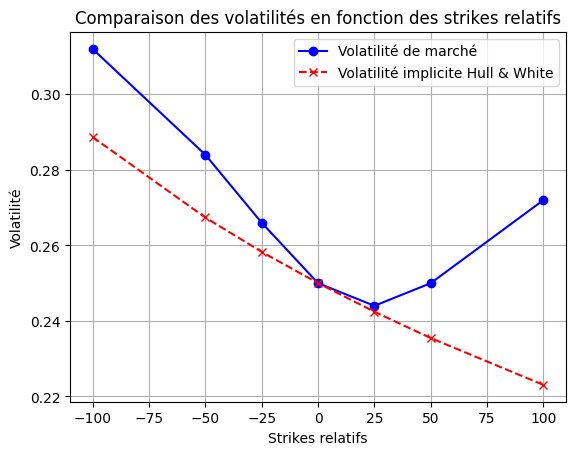

In [159]:
# Tracer les courbes
plt.plot(strikes_rel, vol, label="Volatilité de marché", color='blue', linestyle='-', marker='o')
plt.plot(strikes_rel, vols_implicites, label="Volatilité implicite Hull & White", color='red', linestyle='--', marker='x')

# Ajouter des labels et un titre
plt.xlabel('Strikes relatifs')
plt.ylabel('Volatilité')
plt.title('Comparaison des volatilités en fonction des strikes relatifs')
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.show()

## Section 3.6 valorisation d’un produit structuré

La barrière désactivante dans le cadre de produits dérivés (comme un caplet) est un type de barrière qui, une fois franchie, désactive le produit. Cela signifie que si le sous-jacent franchit une certaine valeur de barrière, l'option ne génère plus de paiement, même si les conditions de l'option sont par la suite remplies.



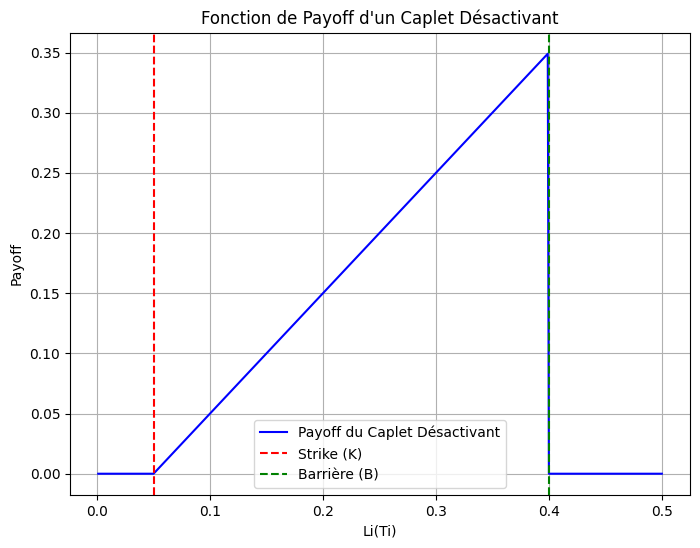

In [165]:
import numpy as np
import matplotlib.pyplot as plt

# Définition des paramètres
delta = 1
Z_T = 1.05  # Exemple de valeur pour Z_T
B = 0.4  # Barrière (B)

# Calcul du strike K
K = (1 / delta) * (Z_T - 1)

# Définition des valeurs possibles pour Li(Ti)
Li_Ti = np.linspace(0.001, 0.5, 500)

# Calcul du payoff du caplet désactivant
payoff = np.maximum(0, Li_Ti - K) * (Li_Ti < B)

# Tracé de la fonction de payoff
plt.figure(figsize=(8, 6))
plt.plot(Li_Ti, payoff, label='Payoff du Caplet Désactivant', color='b')
plt.axvline(x=K, color='r', linestyle='--', label='Strike (K)')
plt.axvline(x=B, color='g', linestyle='--', label='Barrière (B)')
plt.title('Fonction de Payoff d\'un Caplet Désactivant')
plt.xlabel('Li(Ti)')
plt.ylabel('Payoff')
plt.legend()
plt.grid(True)
plt.show()


##### 3.5. On considère un caplet sur euribor12M à barrière désactivante de strike ATM - 100 bps, de barrière ATM + 100 bps et de maturité 5Y. Valoriser cette option à l’aide d’une méthode numérique de type Monte-Carlo 4
